# Mozão - 2 Anos - Hangouts

## Imports

In [1]:
# Módulos usados
import json 
import pandas
from pandas import to_datetime # Para converter os timestamps para data legivel
import numpy as np
from IPython.display import Image
from collections import Counter
from datetime import date
import pytz
import calendar
import seaborn as sns
from wordcloud import WordCloud
# Pacote NLTK
from nltk import tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Carregar o JSON
hangouts_data = json.load(open('Hangouts.json', encoding="utf8"))

## Entendimento dos Dados - Hangouts

In [3]:
# IDs dos participantes
hangouts_data["conversation_state"]["conversation"]["current_participant"]

[{'chat_id': '108078951432980007574', 'gaia_id': '108078951432980007574'},
 {'chat_id': '103068503975180758069', 'gaia_id': '103068503975180758069'}]

In [4]:
# Definindo variaveis dos participantes para facilitar a identificação
part_Jess = '108078951432980007574'
part_Mozao = '103068503975180758069'

In [5]:
# Total de mensagens
total_msg = 114146

In [6]:
# Path principal das mensagens 

# Mensagens
hangouts_data["conversation_state"]["event"][0]["chat_message"]["message_content"]["segment"][0]["text"]

# Quem enviou
hangouts_data["conversation_state"]["event"][0]["sender_id"]

# Data
hangouts_data["conversation_state"]["event"][0]["timestamp"]

'1506520032063960'

In [7]:
# Função que converte os timestamps para data
def msg_date(timestamp):
    timestamp = int(timestamp)
    datetime = to_datetime(timestamp, unit='us').to_pydatetime().replace(tzinfo=pytz.utc)
    return datetime.astimezone(pytz.timezone('America/Sao_Paulo'))

In [8]:
msg_date(hangouts_data["conversation_state"]["event"][0]["timestamp"]).strftime('%d-%m-%Y %H:%M:%S')

'27-09-2017 10:47:12'

In [9]:
# Função que encontra os dias da semanas das datas
def msg_weekday(date):
    return calendar.day_name[date.weekday()]

In [10]:
# Função que encontra os meses
def msg_month(month):
    return calendar.month_name[month]

In [11]:
# Data Inicio
print("Data inicio: %r" %msg_date(hangouts_data["conversation_state"]["event"][114146]["timestamp"]).strftime('%d-%m-%Y %H:%M:%S'))

# Data Fim
print("Data Fim: %r" %msg_date(hangouts_data["conversation_state"]["event"][0]["timestamp"]).strftime('%d-%m-%Y %H:%M:%S'))

Data inicio: '13-11-2015 02:11:23'
Data Fim: '27-09-2017 10:47:12'


Ao todo temos 114147 mensagens, começando pelo dia 13/11/2015 as 04:11 até o 27/09/17 as 13:47.

In [12]:
# coletar e separar informações referente as datas das mensagens

datetimes = []
weekdays = []
times = set() # para impedir duplicatas
days = set()
months = []
years = []
yearmonths = set()
one_month_data = []

event = 0

while event <= total_msg:
    timestamp = hangouts_data["conversation_state"]["event"][event]["timestamp"]
    date = msg_date(timestamp)
    datetimes.append(date.strftime('%d-%m-%Y'))
    days.add(date.day)
    weekdays.append(msg_weekday(msg_date(timestamp)))
    months.append(msg_month(date.month))
    years.append(date.year)
    yearmonths.add((date.year, date.month))
    times.add(date.strftime('%H:%M:%S'))
    if date.year == 2016 and date.month == 4:
        one_month_data.append(d)
    event = event +1    

## Analise das mensagens

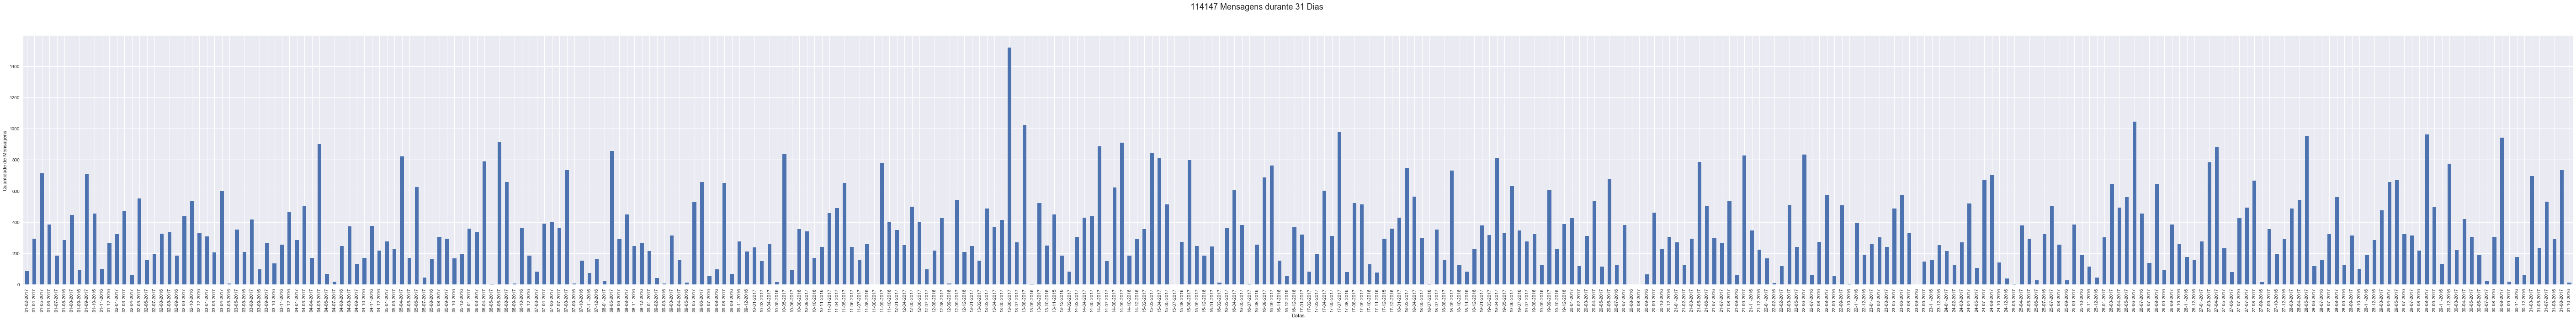

In [13]:
# Mensagens por data/dia
df = pandas.Series(Counter(datetimes))

plt.figure(figsize=(100,10))
df.plot(kind='bar')
plt.xlabel('Datas')
plt.ylabel('Quantidade de Mensagens')
plt.suptitle('{} Mensagens durante {} Dias'.format(len(datetimes), len(days)), fontsize=18)
plt.savefig("mensagens_por_dia.png")
plt.show()

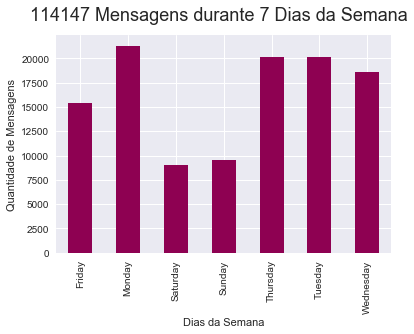

In [14]:
# Mensagens por dia da semana
df = pandas.Series(Counter(weekdays))

plt.figure(0)
df.plot(kind='bar', colormap='PiYG')
plt.xlabel('Dias da Semana')
plt.ylabel('Quantidade de Mensagens')
plt.suptitle('{} Mensagens durante {} Dias da Semana'.format(len(weekdays), len(df)), fontsize=18)
plt.savefig("mensagens_por_diaSemana.png")
plt.show()

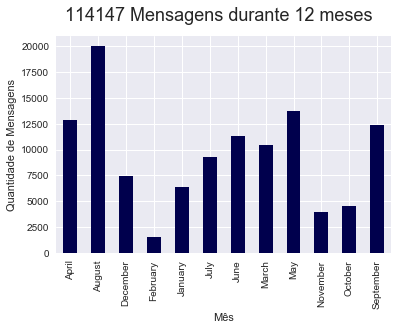

In [15]:
# Mensagens por mês
df = pandas.Series(Counter(months))

plt.figure(0)
df.plot(kind='bar', colormap='seismic')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Mensagens')
plt.suptitle('{} Mensagens durante {} meses'.format(len(datetimes), len(df)), fontsize=18)
plt.savefig("mensagens_por_mes.png")
plt.show()

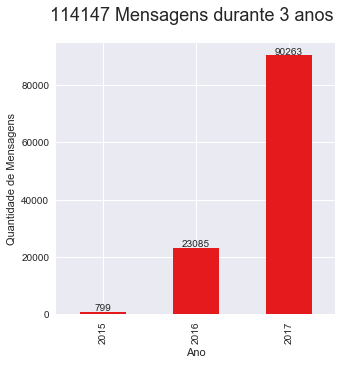

In [16]:
# Mensagens por Ano
df = pandas.Series(Counter(years))

plt.figure(figsize=(5,5))
ax = df.plot(kind='bar', colormap='Set1')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Mensagens')
plt.suptitle('{} Mensagens durante {} anos'.format(len(datetimes), len(df)), fontsize=18)
for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x()+p.get_width()/2.,
            height + 505,
            '{:1}'.format(height),
            ha="center")
plt.savefig("mensagens_por_ano.png")
plt.show()

In [17]:
# coletar e separar informações referente as datas das mensagens por sender
# Estou colentando a quantidade de mensagens baseadas nos timestamp de cada uma, pois cada mensagem 
# possi um unico timestamp...economia de espaço do dict (numero é melhor e menor do que texto)

dates_by_sender = {}

event = 0
#total_msg = 10

while event <= total_msg:
    sender_id = hangouts_data["conversation_state"]["event"][event]["sender_id"]["gaia_id"]
    timestamp = hangouts_data["conversation_state"]["event"][event]["timestamp"]
    if sender_id not in dates_by_sender:
        dates_by_sender[sender_id] = []
    dates_by_sender[sender_id].append(timestamp)
    event = event +1    

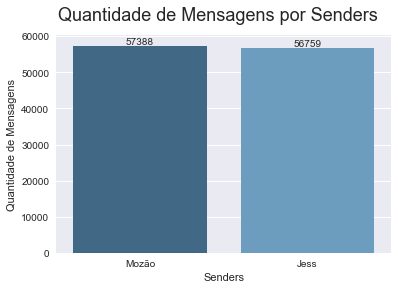

In [18]:
# Quantidade de Mensagens por Senders

senders = [part_Mozao, part_Jess]
dates_by_sender_value = []

for s in senders:
    if s == part_Mozao:
        msgMozao = len(dates_by_sender[s])
        dates_by_sender_value.append(msgMozao)
    else:
        msgJess = len(dates_by_sender[s])
        dates_by_sender_value.append(msgJess)

ax = sns.barplot(x=['Mozão', 'Jess'], y=dates_by_sender_value, palette="Blues_d")
plt.xlabel('Senders')
plt.ylabel('Quantidade de Mensagens')
plt.suptitle('Quantidade de Mensagens por Senders', fontsize=18)
for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x()+p.get_width()/2.,
            height + 505,
            '{:1}'.format(height),
            ha="center")
plt.savefig("mensagens_por_sender.png")
plt.show()

In [19]:
# Quantidade de mensagens por dia e mês - Jessica

dates_by_sender_detail_Jess = []
months_by_sender_detail_Jess = []
weekdays_by_sender_detail_Jess = []
years_by_sender_detail_Jess = []
times_by_sender_detail_Jess = []

event = 0
#total_msg = 3000
    
while event <= total_msg:
    sender_id = hangouts_data["conversation_state"]["event"][event]["sender_id"]["gaia_id"]
    timestamp = hangouts_data["conversation_state"]["event"][event]["timestamp"]
    if sender_id == part_Jess:
        date = msg_date(timestamp)
        dates_by_sender_detail_Jess.append(date.strftime('%d-%m-%Y'))
        weekdays_by_sender_detail_Jess.append(msg_weekday(msg_date(timestamp)))
        months_by_sender_detail_Jess.append(date.month)
        years_by_sender_detail_Jess.append(date.year)
        times_by_sender_detail_Jess.append(date.strftime('%H:%M:%S'))
    event = event +1 

In [20]:
# Quantidade de mensagens por dia e mês - Mozão

dates_by_sender_detail_Mozao = []
months_by_sender_detail_Mozao = []
weekdays_by_sender_detail_Mozao = []
years_by_sender_detail_Mozao = []
times_by_sender_detail_Mozao = []

event = 0

while event <= total_msg:
    sender_id = hangouts_data["conversation_state"]["event"][event]["sender_id"]["gaia_id"]
    timestamp = hangouts_data["conversation_state"]["event"][event]["timestamp"]
    if sender_id == part_Mozao:
        date = msg_date(timestamp)
        dates_by_sender_detail_Mozao.append(date.strftime('%d-%m-%Y'))
        weekdays_by_sender_detail_Mozao.append(msg_weekday(msg_date(timestamp)))
        months_by_sender_detail_Mozao.append(date.month)
        years_by_sender_detail_Mozao.append(date.year)
        times_by_sender_detail_Mozao.append(date.strftime('%H:%M:%S'))
    event = event +1  

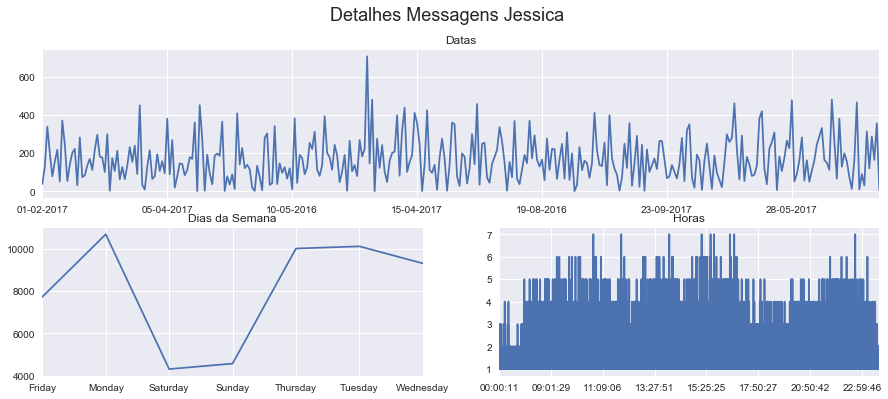

In [21]:
# Gráficos das mensagens de cada sender por dia, mês e ano - Jessica

dd = pandas.Series(Counter(dates_by_sender_detail_Jess)) # dates details
wd = pandas.Series(Counter(weekdays_by_sender_detail_Jess)) # weekdays details
md = pandas.Series(Counter(months_by_sender_detail_Jess)) # months details
yd = pandas.Series(Counter(years_by_sender_detail_Jess)) # years details
td = pandas.Series(Counter(times_by_sender_detail_Jess)) # times details

fig = plt.figure(figsize=(15,6))

plt.suptitle('Detalhes Messagens Jessica', fontsize=18)

# Grafico de Datas
ax1 = fig.add_subplot(211)
ax11 = dd.plot(ax=ax1)
ax1.title.set_text('Datas')

# Grafico de Weekdays
ax2 = fig.add_subplot(223)
ax22 = wd.plot(ax=ax2)
ax2.title.set_text('Dias da Semana')

# Grafico de Months
#ax3 = fig.add_subplot(224)
#ax33 = md.plot(ax=ax3)
#ax3.title.set_text('Months')

# Grafico de Years
#ax4 = fig.add_subplot(224)
#ax44 = yd.plot(ax=ax4)
#ax4.title.set_text('Years')

# Grafico de Times
ax5 = fig.add_subplot(224)
ax55 = td.plot(ax=ax5)
ax5.title.set_text('Horas')

plt.show()



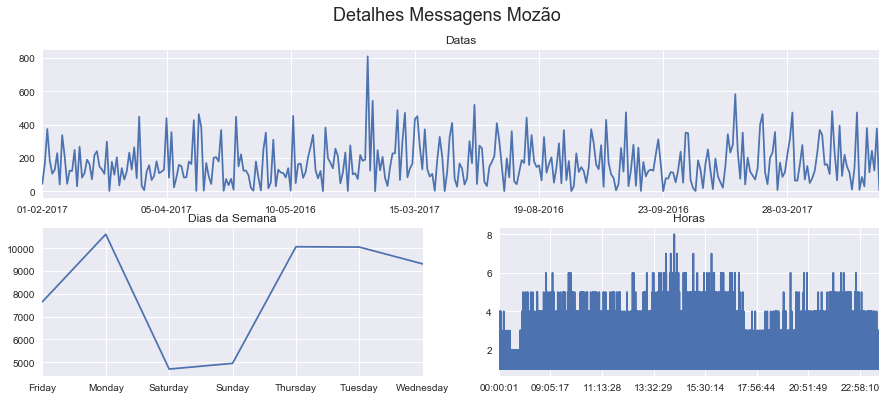

In [22]:
# Dashboard das mensagens de cada sender por dia, mês e ano - Mozão

dd = pandas.Series(Counter(dates_by_sender_detail_Mozao)) # dates details
wd = pandas.Series(Counter(weekdays_by_sender_detail_Mozao)) # weekdays details
md = pandas.Series(Counter(months_by_sender_detail_Mozao)) # months details
yd = pandas.Series(Counter(years_by_sender_detail_Mozao)) # years details
td = pandas.Series(Counter(times_by_sender_detail_Mozao)) # times details

fig = plt.figure(figsize=(15,6))

plt.suptitle('Detalhes Messagens Mozão', fontsize=18)

# Grafico de Datas
ax1 = fig.add_subplot(211)
ax11 = dd.plot(ax=ax1)
ax1.title.set_text('Datas')

# Grafico de Weekdays
ax2 = fig.add_subplot(223)
ax22 = wd.plot(ax=ax2)
ax2.title.set_text('Dias da Semana')

# Grafico de Months
#ax3 = fig.add_subplot(224)
#ax33 = md.plot(ax=ax3)
#ax3.title.set_text('Months')

# Grafico de Years
#ax4 = fig.add_subplot(224)
#ax44 = yd.plot(ax=ax4)
#ax4.title.set_text('Years')

# Grafico de Times
ax5 = fig.add_subplot(224)
ax55 = td.plot(ax=ax5)
ax5.title.set_text('Horas')

plt.show()

## Analisando as Mensagens

### Tipos das Mensagens

In [23]:
# Mensagens 

msg_Jess = []
qtd_fotos_Jess = []
qtd_audios_video_Jess = []
msg_Mozao = []
qtd_fotos_Mozao = []
qtd_audios_video_Mozao = []

event = 0

# Quebra as mensagens por sender_id e as separa pelos tipos
# Texto
# Audio/Video
# Fotos

while event <= total_msg:
    sender_id = hangouts_data["conversation_state"]["event"][event]["sender_id"]["gaia_id"]
    if sender_id == part_Jess:
        try:
            msg_Jess.append(hangouts_data["conversation_state"]["event"][event]['chat_message']['message_content']['segment'][0]['text'])
        except KeyError:
            try:
                qtd_audios_video_Jess.append(hangouts_data["conversation_state"]["event"][event]['hangout_event']['media_type'])
            except:
                qtd_fotos_Jess.append(hangouts_data["conversation_state"]["event"][event]['chat_message']['message_content']['attachment'][0]['embed_item']['embeds.PlusPhoto.plus_photo']['media_type'])
    else:
        try:
            msg_Mozao.append(hangouts_data["conversation_state"]["event"][event]['chat_message']['message_content']['segment'][0]['text'])
        except KeyError:
            try:
                qtd_audios_video_Mozao.append(hangouts_data["conversation_state"]["event"][event]['hangout_event']['media_type'])
            except:
                qtd_fotos_Mozao.append(hangouts_data["conversation_state"]["event"][event]['chat_message']['message_content']['attachment'][0]['embed_item']['embeds.PlusPhoto.plus_photo']['media_type'])
    event = event +1

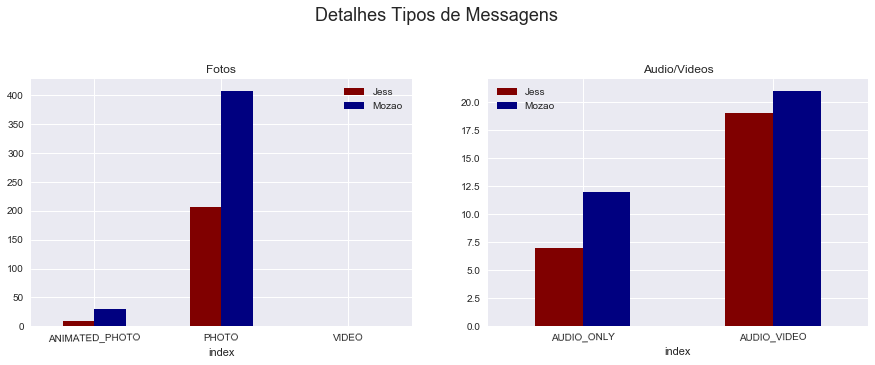

In [24]:
# Dashboard dos tipos mensagens

fj = pandas.Series(Counter(qtd_fotos_Jess), name='Jess') 
fm = pandas.Series(Counter(qtd_fotos_Mozao), name='Mozao')
vj = pandas.Series(Counter(qtd_audios_video_Jess), name='Jess') 
vm = pandas.Series(Counter(qtd_audios_video_Mozao), name='Mozao')

fotos = pandas.pivot_table(pandas.concat([fj, fm], axis=1).reset_index(), index=["index"])
av = pandas.pivot_table(pandas.concat([vj, vm], axis=1).reset_index(), index=["index"])

fig = plt.figure(figsize=(15,10))

plt.suptitle('Detalhes Tipos de Messagens', fontsize=18)

ax1 = fig.add_subplot(221)
ax11 = fotos.plot.bar(ax=ax1, rot = 1, colormap='jet_r')
ax1.title.set_text('Fotos')


ax1 = fig.add_subplot(222)
ax11 = av.plot.bar(ax=ax1, rot = 1, colormap='jet_r')
ax1.title.set_text('Audio/Videos')

plt.show()

### Tokenize e Frequência de Palavras

In [25]:
# Criando arquivo txt das mensagens 
event = 0
tokensJ = []

file_msg_Jess = open("file_msg_Jess.txt", "w", encoding = "utf-8")

# Separar as palavras das frases
while event < len(msg_Jess):
    text = msg_Jess[event]
    tokens = word_tokenize(text)
    for t in text.split():
        file_msg_Jess.write(t + " ")
    event = event +1

file_msg_Jess.close()

In [26]:
# Criando arquivo txt das mensagens 
event = 0
tokensM = []

file_msg_Mozao= open("file_msg_Mozao.txt", "w", encoding = "utf-8")

# Separar as palavras das frases
while event < len(msg_Mozao):
    text = msg_Mozao[event]
    tokens = word_tokenize(text)
    for t in text.split():
        file_msg_Mozao.write(t + " ")
    event = event +1

file_msg_Mozao.close()

In [34]:
# Identifica os tokens 
with open('file_msg_Jess.txt', encoding = 'utf-8') as f:
    texto = f.read()
    tokensJ = word_tokenize(texto)
f.close()

with open('file_msg_Mozao.txt', encoding = 'utf-8') as f:
    texto = f.read()
    tokensM = word_tokenize(texto)
f.close()

# Quantidade de tokens
print(len(tokensJ))
print(len(tokensM))

196158
201809


In [45]:
# Removendo StopWords
portuguese_stops = set(stopwords.words('portuguese'))

for token in tokensJ: 
    if token in portuguese_stops:
        tokensJ.remove(token)

for token in tokensM: 
    if token in portuguese_stops:
        tokensM.remove(token)

# Quantidade de tokens após a remoção das StopWords
print(len(tokensJ))
print(len(tokensM))   

78083
75828


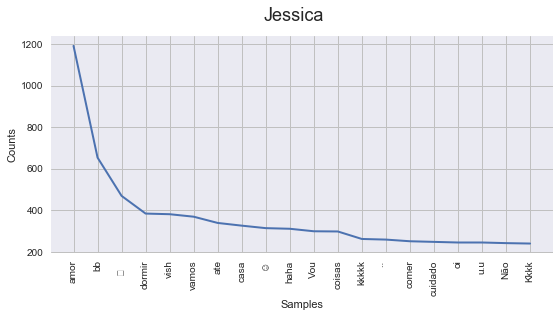

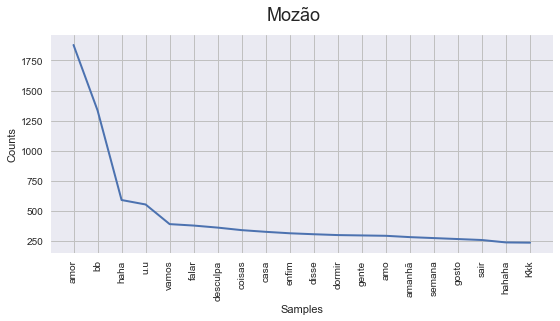

In [46]:
# Frequencia das palavras
freqJ = FreqDist(tokensJ)
freqM = FreqDist(tokensM)
 
#for key,val in freq.items():
#    print (str(key) + ':' + str(val))

fig = plt.figure(figsize=(9,4))
plt.suptitle('Jessica', fontsize=18)
freqJ.plot(20, cumulative=False)

fig2 = plt.figure(figsize=(9,4))
plt.suptitle('Mozão', fontsize=18)
freqM.plot(20, cumulative=False)



### WordCloud

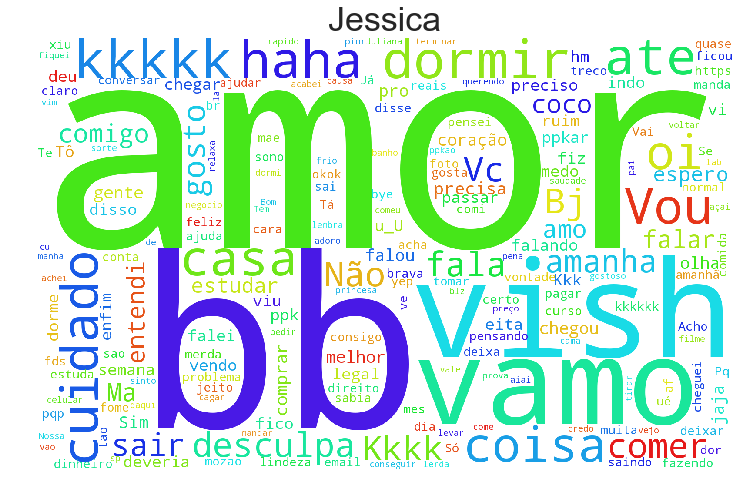

In [47]:
wordcloud = WordCloud(background_color="white", width = 800, height = 500, scale=2).generate(' '.join(tokensJ))
plt.figure(figsize=(15,8))
plt.title("Jessica", fontsize=34)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

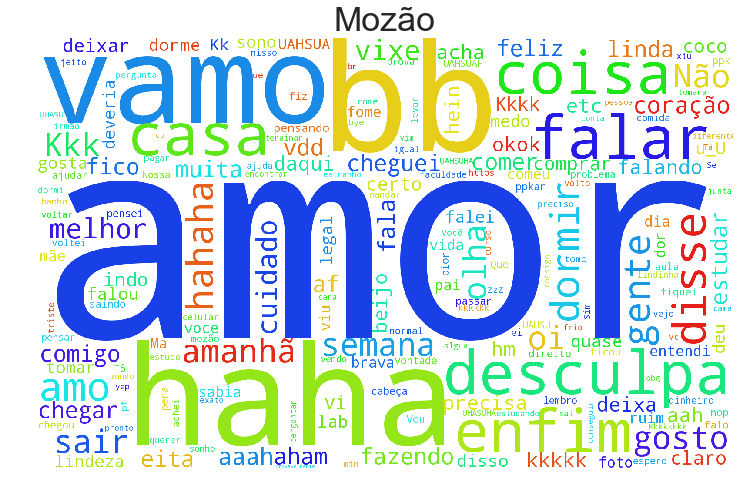

In [49]:
wordcloud = WordCloud(background_color="white", width = 800, height = 500, scale=2).generate(' '.join(tokensM))
plt.figure(figsize=(15,8))
plt.title("Mozão", fontsize=34)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()